## План выполнения проекта:
### Часть 1. Подготовка данных
    Загрузить данные
    Исследовать данные
    Проверить качество данных
    Привести данные в нужный формат


### Часть 2. Приоритизация гипотез.
    Задача
    Применить фреймворк ICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
    Применить фреймворк RICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
    Указать, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объяснить, почему так произошло.
### Часть 3. Анализ A/B-теста
    Задача
    Проанализировать A/B-тест:
    Построить график кумулятивной выручки по группам. Сделать выводы и предположения.
    Построить график кумулятивного среднего чека по группам. Сделать выводы и предположения.
    Построить график относительного изменения кумулятивного среднего чека группы B к группе A. Сделать выводы и предположения.
    Построить график кумулятивной конверсии по группам. Сделать выводы и предположения.
    Построить график относительного изменения кумулятивной конверсии группы B к группе A. Сделать выводы и предположения.
    Построить точечный график количества заказов по пользователям. Сделать выводы и предположения.
    Посчитать 95-й и 99-й перцентили количества заказов на пользователя. Выбрать границу для определения аномальных пользователей.
    Построить точечный график стоимостей заказов. Сделать выводы и предположения.
    Построить 95-й и 99-й перцентили стоимости заказов. Выберать границу для определения аномальных заказов.
    Посчитать статистическую значимость различий в конверсии между группами по «сырым» данным. Сделать выводы и предположения.
    Посчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделать выводы и предположения.
    Посчитать статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделать выводы и предположения.
    Посчитать статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделать выводы и предположения.
    Принять решение по результатам теста и объяснить его. Варианты решений: 1. Остановить тест, зафиксировать победу одной из групп. 2. Остановить тест, зафиксировать отсутствие различий между группами. 3. Продолжить тест.

## Часть 1. Подготовка данных

In [1]:
#В данном шаге добавляем необходимые библиотеки

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy import stats as st
import seaborn as sns    

In [2]:
# Загружаем доступные нам данные для проведения исследования
try:
    
    hypothesis = pd.read_csv('/datasets/hypothesis.csv')
    orders = pd.read_csv('/datasets/orders.csv')
    visitors = pd.read_csv('/datasets/visitors.csv')
except:
    
    hypothesis = pd.read_csv('https://code.s3.yandex.net/datasets/hypothesis.csv')
    orders = pd.read_csv('https://code.s3.yandex.net/datasets/orders.csv')
    visitors = pd.read_csv('https://code.s3.yandex.net/datasets/visitors.csv')

In [3]:
pd.set_option("max_colwidth", 109) # параметр для вывода полного названия гипотез
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [4]:
orders.sample(10)

,transactionId,visitorId,date,revenue,group
663,2612401984,2393492379,2019-08-29,2590,A
1150,1722995581,2761566146,2019-08-14,1390,A
910,1612010084,2008082479,2019-08-08,2550,B
0,3667963787,3312258926,2019-08-15,1650,B
1190,38478481,1197745035,2019-08-14,8600,B
708,3256245027,993094131,2019-08-07,1399,B
34,2153010762,834683205,2019-08-15,22785,A
386,1802431162,3127757912,2019-08-03,20990,A
521,641338041,623318263,2019-08-26,10440,B
287,587872075,2254456485,2019-08-24,53904,A


In [5]:
visitors.sample(10)

,date,group,visitors
36,2019-08-06,B,655
28,2019-08-29,A,577
38,2019-08-08,B,654
60,2019-08-30,B,490
12,2019-08-13,A,748
54,2019-08-24,B,378
3,2019-08-04,A,717
45,2019-08-15,B,544
19,2019-08-20,A,575
8,2019-08-09,A,617


In [6]:
print(orders.duplicated().sum())
print(orders.duplicated().sum())
print(orders.isna().sum())
print(orders.isna().sum())
print(orders.info())
print(orders.info())

0
0
transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64
transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   obj

In [7]:
# Изменим формат данных object на дату
orders['date'] = pd.to_datetime(orders['date'])
visitors['date'] = pd.to_datetime(visitors['date'])

С данными все в порядке можем приступать к следующему шагу.

In [8]:
print(orders[orders['group']=='A']['visitorId'].isin((orders[orders['group']=='B']['visitorId'])).sum())

89


In [9]:
same_users = orders.groupby('visitorId').agg({'group':['nunique','unique']})
same_users.columns=['groups','group_names']
same_users =  same_users[same_users['groups']>1]
display(same_users.head(5))
print(len(same_users))

,groups,group_names
visitorId,,
8300375,2,"[B, A]"
199603092,2,"[A, B]"
232979603,2,"[B, A]"
237748145,2,"[B, A]"
276558944,2,"[B, A]"


58


In [10]:
same_users

,groups,group_names
visitorId,,
8300375,2,"[B, A]"
199603092,2,"[A, B]"
232979603,2,"[B, A]"
237748145,2,"[B, A]"
276558944,2,"[B, A]"
351125977,2,"[B, A]"
393266494,2,"[A, B]"
457167155,2,"[B, A]"
471551937,2,"[A, B]"


## Часть 2. Приоритизация гипотез.


In [11]:
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


### Применим фреймворк ICE для приоритизации гипотез. 

Рассчет фреймворка ICE будет проводиться по формуле: $$ICE =  \frac {Impact * Confidence} { Efforts} $$

In [12]:
hypothesis['ICE'] = round((hypothesis['Impact'] * hypothesis['Confidence']) / hypothesis['Efforts'],1)
hypothesis['ICE_Rank'] = hypothesis['ICE'].rank()

In [13]:
hypothesis.sort_values(by = 'ICE', ascending = False)

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,ICE_Rank
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.2,9.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.3,8.0
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.2,7.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.0,6.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.0,5.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.0,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.3,3.0
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.1,2.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.0,1.0


Как мы можем наблюдать приоритетной гипотезой по фреймворку ICE оказалась гипотеза под номером 8

### Применим фреймворк RICE для приоритизации гипотез.

Рассчет фреймворка RICE будет проводиться по формуле: $$RICE =  \frac {Reach * Impact * Confidence} { Efforts} $$

In [14]:
hypothesis['RICE'] = (hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence']) / hypothesis['Efforts']
hypothesis['RICE_Rank'] = hypothesis['RICE'].rank()

In [15]:
hypothesis.sort_values(by = 'RICE', ascending = False)


,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,ICE_Rank,RICE,RICE_Rank
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.2,7.0,112.0,9.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.0,5.0,56.0,8.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.3,8.0,40.0,6.5
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.0,6.0,40.0,6.5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.2,9.0,16.2,5.0
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.1,2.0,9.0,4.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.0,4.0,4.0,2.5
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.3,3.0,4.0,2.5
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.0,1.0,3.0,1.0


Приоритетной гипотезой по фреймворку ICE оказалась гипотеза под номером 7

In [16]:
numeric_columns = ['RICE', 'ICE'] 
(hypothesis[['Hypothesis', 'RICE', 'ICE']]
 .sort_values(['RICE', 'ICE'], ascending=[False, False])
 .style
 .highlight_max(color='yellowgreen', subset=numeric_columns)
 .highlight_min(color='coral', subset=numeric_columns)
)

,Hypothesis,RICE,ICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.000000,11.200000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.000000,7.000000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.000000,13.300000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.000000,8.000000
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000,16.200000
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.000000,1.100000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.000000,2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.000000,1.300000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.000000,1.000000


### Указать, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объяснить, почему так произошло.

In [17]:
hypothesis[['Hypothesis','ICE_Rank','RICE_Rank']]

,Hypothesis,ICE_Rank,RICE_Rank
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",8.0,6.5
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0,2.5
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",5.0,8.0
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",2.0,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.0,1.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3.0,2.5
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",6.0,6.5
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",7.0,9.0
8,"Запустить акцию, дающую скидку на товар в день рождения",9.0,5.0


При применении разных фреймворков позиции в приоритете гипотез изменились. Некоторые гипотезы потеряли несколько позиций часть наоборот набрали. Это произошло из за того что фреймворк ICE не учитывает такой параметр как Reach(Охват пользователей). Соответсвенно можно сделать вывод что 7 гипотеза повлияет на всех пользователей продукта в отличии от 8.

## Часть 3. Анализ A/B-теста

### Построим график кумулятивной выручки по группам. Сделаем выводы и предположения.

In [18]:
#Соберём агрегированные кумулятивные по дням данные о заказах
datesGroups = orders[['date','group']].drop_duplicates() 

ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
                                     .agg({'date':'max','group':'max', 'transactionId':'nunique','visitorId':'nunique','revenue':'sum'}), axis = 1).sort_values(by = ['date','group'])

#Так же для последующих расчетов посчитаем кумулятивные данные о посетятелях магазина (для расчета среднего чека и т.д.)
visitorsAggregated = visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

#Объеденим данные таблицы
cumulativeData = ordersAggregated.merge(visitorsAggregated, how = 'left', on = ['date','group'])

In [19]:
cumulativeData.sample(5)

,date,group,transactionId,visitorId,revenue,visitors
22,2019-08-12,A,230,210,1562873,7575
28,2019-08-15,A,283,259,1979057,9686
52,2019-08-27,A,495,449,3514698,16376
1,2019-08-01,B,21,20,101217,713
31,2019-08-16,B,359,336,2539635,10013


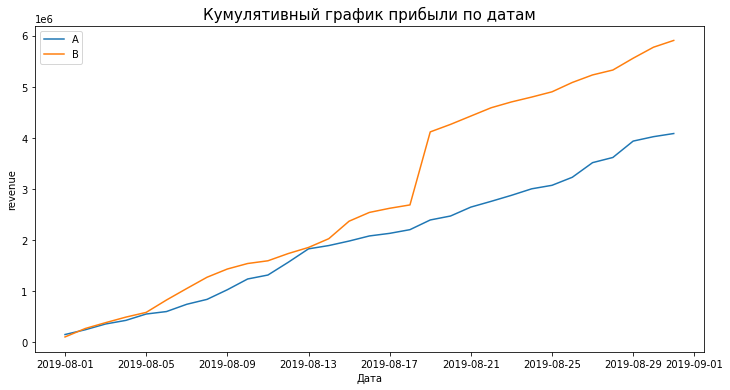

In [20]:
#Разобьем по группам и построим графики
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

plt.figure(figsize=(12,6))
plt.plot(cumulativeDataA['date'],cumulativeDataA['revenue'], label='A')
plt.plot(cumulativeDataB['date'],cumulativeDataB['revenue'], label='B')
plt.title('Кумулятивный график прибыли по датам', fontsize = 15)
plt.xlabel('Дата')
plt.ylabel('revenue')
plt.legend()
plt.show()

Суда по графику выручка увеличивается в течение всего теста. Однако график выручки группы Б в точке ~18 19 августа резко растет. Это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке.

### Построим график кумулятивного среднего чека по группам. Сделаем выводы и предположения.

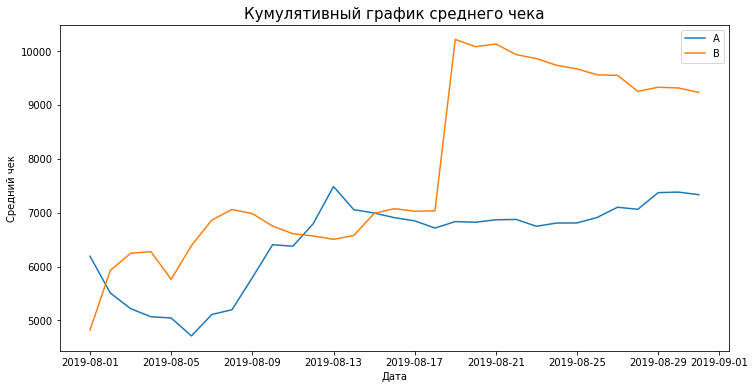

In [21]:
#Воспользуемся данными полученными в предыдущем шаге для расчета среднего чека

plt.figure(figsize=(12,6))
plt.plot(cumulativeDataA['date'],cumulativeDataA['revenue'] / cumulativeDataA['transactionId'], label='A')
plt.plot(cumulativeDataB['date'],cumulativeDataB['revenue'] / cumulativeDataB['transactionId'], label='B')
plt.title('Кумулятивный график среднего чека', fontsize = 15)
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.legend()
plt.show()

Судя по данному графику в данных группы Б есть вброс один или несколько очень дорогих заказов.

### Построим график относительного изменения кумулятивного среднего чека группы B к группе A. Сделаем выводы и предположения.

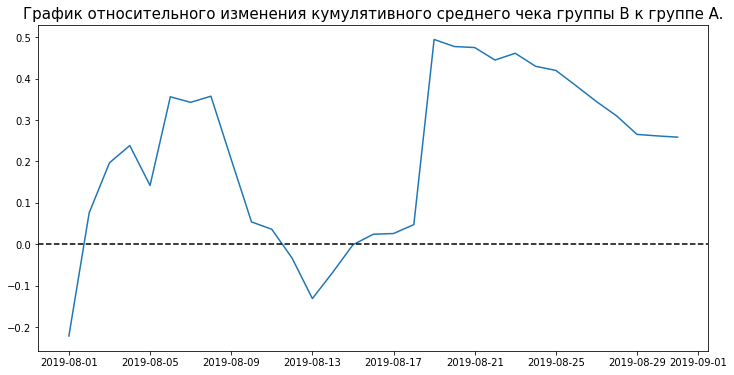

In [22]:
#объеденим данные из cumulativeDataA и cumulativeDataB для сравнения кумулятивных средних чеков и построим графики

mergedcumulativeData = cumulativeDataA.merge(cumulativeDataB, how = 'left', on = 'date', suffixes = ['A','B'])


plt.figure(figsize=(12,6))

plt.plot(mergedcumulativeData['date'], (mergedcumulativeData['revenueB']/mergedcumulativeData['transactionIdB'])/(mergedcumulativeData['revenueA']/mergedcumulativeData['transactionIdA'])-1)
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A.', fontsize = 15)
#plt.xlabel('Дата') Не понимаю по какой причине не могу подписать ось, подскажите плиз
plt.axhline(y=0, color='black', linestyle='--') # добавим на график линию где средние чеки равны, для наглядности.
plt.show()

Отношение чека колеблится относительно груп до момента круного(крупных) заказов.

### Построим график кумулятивной конверсии по группам. Сделаем выводы и предположения.

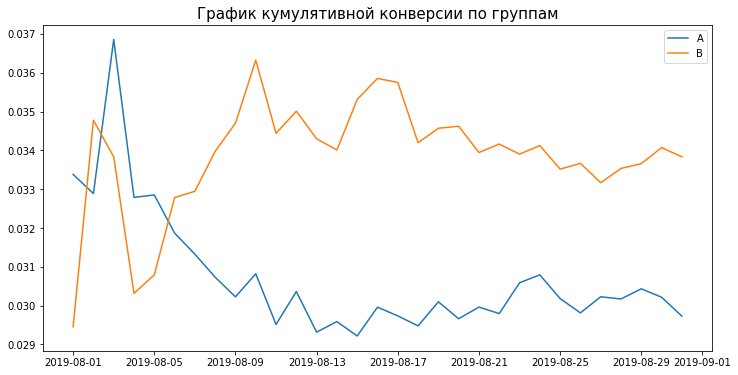

In [23]:
plt.figure(figsize=(12,6))
plt.plot(mergedcumulativeData['date'],mergedcumulativeData['transactionIdA'] / mergedcumulativeData['visitorsA'], label = 'A')
plt.plot(mergedcumulativeData['date'],mergedcumulativeData['transactionIdB'] / mergedcumulativeData['visitorsB'], label = 'B')
plt.title('График кумулятивной конверсии по группам', fontsize = 15)
plt.legend()
plt.show()

Видим что конверсия группы Б со временем стала выше и зафиксировалась, возможно это и была основаня цель нововвидений.

### Построим график относительного изменения кумулятивной конверсии группы B к группе A.

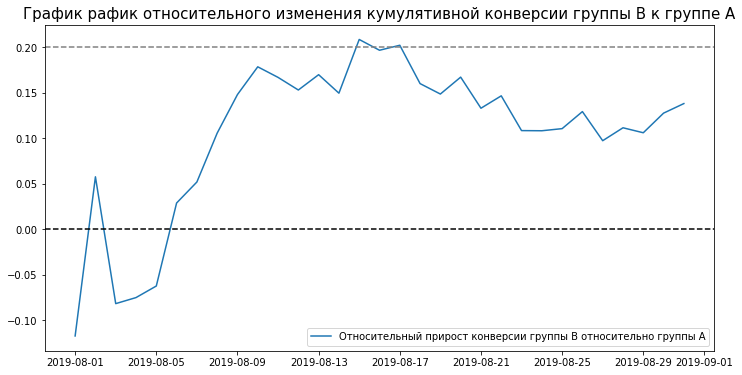

In [24]:
plt.figure(figsize=(12,6))
plt.plot(mergedcumulativeData['date'], (mergedcumulativeData['transactionIdB'] / mergedcumulativeData['visitorsB']) / 
         ((mergedcumulativeData['transactionIdA'] / mergedcumulativeData['visitorsA']) )-1, label = 'Относительный прирост конверсии группы B относительно группы A')
plt.title('График рафик относительного изменения кумулятивной конверсии группы B к группе A', fontsize = 15)
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='gray', linestyle='--')
plt.legend()
plt.show()


###  Построим точечный график количества заказов по пользователям. Сделаем выводы и предположения.

In [25]:
#Посчитаем количество заказов для каждого пользователя

users_orders = (orders.groupby('visitorId', as_index = False)
                .agg({'transactionId':'nunique'}))

In [26]:
users_orders.sort_values(by = 'transactionId', ascending = False).head(5)

,visitorId,transactionId
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5


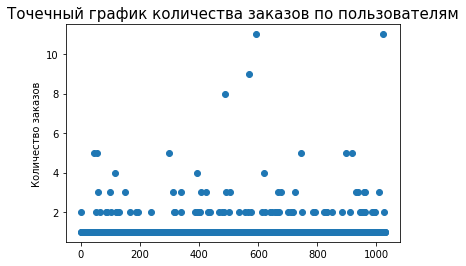

In [27]:
x_values = pd.Series(range(0,len(users_orders)))
plt.scatter(x_values,users_orders['transactionId'])
plt.title('Tочечный график количества заказов по пользователям', fontsize =15 )
plt.ylabel('Количество заказов')
plt.show()

Видим, что основное количетсво заказов это 1. Затем количество заказов равное 2. Но на сколько много заказов превышающих 4 на графике не совсем понятно.

### Посчитать 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей.

In [28]:
print(np.percentile(users_orders['transactionId'], [95, 99])) 

[2. 4.]


Видим что 5% пользователей совершали более 2 и всего  1%  пользователей совершили более 4-х заказов. Разумно отобрать за нижнюю границу количество заказов равное 3м и отсеять аномальных пользователей по ней. количество потерянных данных будет менее 5%

### Построим точечный график стоимостей заказов. Сделаем выводы и предположения.

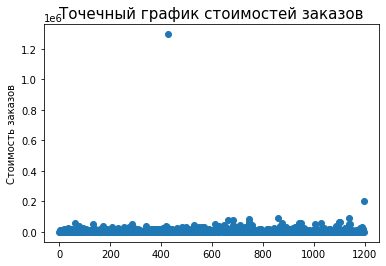

In [29]:
x_values_r = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values_r, orders['revenue'])
plt.title('Tочечный график стоимостей заказов', fontsize =15 )
plt.ylabel('Стоимость заказов')
plt.show()


По графику видно что есть заказы со стоимостью сильно превышающие все остальные. Вероятно что самая высокая точка и является той анамалией которая сильно повлияла на предыдущие графики. Из данного графика сделать вывод о сумме которою можно считать как вброссы не возможно.

### Построим 95-й и 99-й перцентили стоимости заказов. Выберать границу для определения аномальных заказов.

In [30]:
print(np.percentile(orders['revenue'],[95,99]))
print(orders[orders['revenue']>30000]['revenue'].count())

[28000.  58233.2]
54


Количетсво заказов превышающих 28 000 не более 5% и 58233 не более 1%. Количество заказов более 30 000 54. Будем считать эти заказы аномальными.

### Посчитем статистическую значимость различий в конверсии между группами по «сырым» данным. Сделать выводы и предположения.

Перед тем как считать статистическую значимость необходимо определить метод которым будем пользоваться. Проверим данные на нормальность.

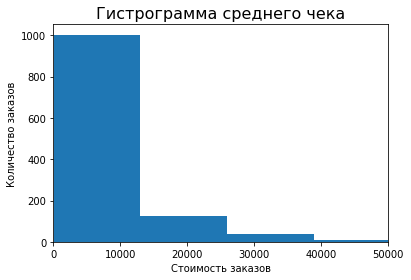

In [31]:
plt.hist(orders['revenue'], bins = 100)
plt.title('Гистрограмма среднего чека', fontsize = 16)
plt.ylabel('Количество заказов')
plt.xlabel('Стоимость заказов')
plt.xlim([0, 50000])
plt.show()

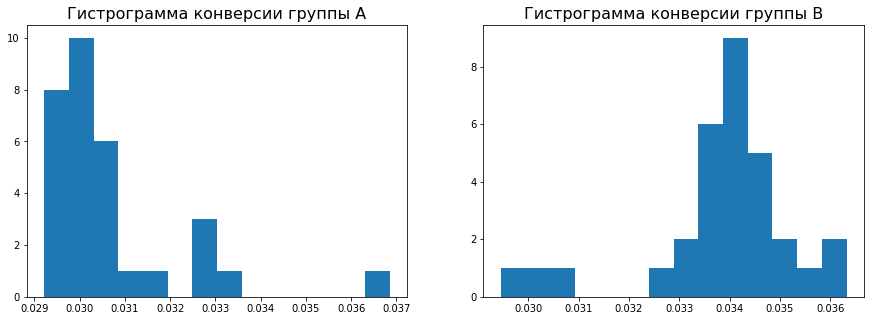

In [32]:

plt.figure(figsize=(15, 5))
ax1 = plt.subplot(1, 2, 1)
plt.hist((mergedcumulativeData['transactionIdA'] / mergedcumulativeData['visitorsA']), bins = 14)
plt.title('Гистрограмма конверсии группы А', fontsize = 16)


ax1 = plt.subplot(1, 2, 2)
plt.hist((mergedcumulativeData['transactionIdB'] / mergedcumulativeData['visitorsB']), bins = 14)
plt.title('Гистрограмма конверсии группы B', fontsize = 16)


plt.show()

Проверим методом st.shapiro(x), можно ли считать эти величины  нормально распределенными. H0 - Распределение конверсии носит нормальный характер. H1 распределение конверсии не нормально

In [33]:
alpha = 0.05  # критический уровень статистической значимости
s_conersion_rate = pd.Series(mergedcumulativeData['transactionIdA'] / mergedcumulativeData['visitorsA'])

results = st.shapiro(s_conersion_rate)
p_value = results[
    1
]  # второе значение в массиве результатов (с индексом 1) - p-value

print('p-значение: ', p_value)
if p_value < alpha:
    print('Отвергаем нулевую гипотезу: распределение не нормально')
else:
    print('Не получилось отвергнуть нулевую гипотезу, всё нормально') 

p-значение:  6.356380254146643e-06
Отвергаем нулевую гипотезу: распределение не нормально


Проверим методом st.shapiro(x), можно ли считать эти величины  нормально распределенными. H0 - Распределение выручки носит нормальный характер. H1 распределение выручки не нормально

In [34]:
alpha = 0.05  # критический уровень статистической значимости
orders_revenue = pd.Series(orders['revenue'])

results = st.shapiro(orders_revenue)
p_value = results[
    1
]  # второе значение в массиве результатов (с индексом 1) - p-value

print('p-значение: ', p_value)
if p_value < alpha:
    print('Отвергаем нулевую гипотезу: распределение не нормально')
else:
    print('Не получилось отвергнуть нулевую гипотезу, всё нормально') 

p-значение:  0.0
Отвергаем нулевую гипотезу: распределение не нормально


Можем наблюдать не нормальное распределение для выручки что характерно для таких велечин. Поэтому для анализа ститастичиской значимости конверсии и среднего чека будем использовать непараметрический тест Уилкоксона-Манна-Уитни.

Сформулируем нулевую гипотезу H0 - Статистически значимых различий в конверсии между группами А И Б нет. И альтернативную H1 - Статистически значимые различия в конверсии между групами А и В есть.

In [35]:
# Сздадим общий файл с данными - data


visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)



In [36]:
data.sample(5)

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
12,2019-08-13,14,263638,21,119671,244,1826511,285,1853738,748,769,8323,8310
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
21,2019-08-22,16,112741,25,162355,401,2756579,462,4589247,609,650,13459,13524
29,2019-08-30,11,86460,24,215233,545,4022970,620,5774631,490,490,18037,18198
30,2019-08-31,12,61833,20,133129,557,4084803,640,5907760,699,718,18736,18916


Создадим переменные ordersByUsersA и ordersByUsersB со столбцами ['userId', 'orders']. В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов.

In [37]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders'] 

Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули. Это нужно, чтобы подготовить выборки к проверке критерием Манна-Уитни.

In [38]:
sampleA = (pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - 
            len(ordersByUsersA['orders'])), name='orders')],axis=0))

sampleB = (pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - 
        len(ordersByUsersB['orders'])), name='orders')],axis=0))

In [39]:
print('Значение p_value',"{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1],alternative="two-sided"))



Значение p_value 0.017


In [40]:
print('Значение p_value',"{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

Значение p_value 0.017


Вывод: Статистическое различие мужду группами А и В есть. p_value = 0.008 меньше 0.05 Значит гипотезу о том, что статистически значимых различий между групами нет, отвергаем.

In [41]:
# Расчитаем разницу между конверсий груп А и В
print('Относительное изменение конверсии группы B к группе А:',"{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

Относительное изменение конверсии группы B к группе А: 0.138


Видим что коневерсия группы В на 13.8% выше и она является статистически значимой.

###  Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделать выводы и предположения.

Сформулируем нулевую гипотезу H0 - В среднем чеке различий для груп А и В нет. И альтернативную H1 -  Средний чек для груп А и В не равен.

Передадим критерию mannwhitneyu() данные о  выручке с заказов 

In [42]:
print('Значение p_value:','{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))

Значение p_value: 0.729


Вывод: P-value  больше 0.05. Значит, отвергать нулевую гипотезу - В среднем чеке различий для груп А и В нет, нет достаточных оснований.

### Посчитаем статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделать выводы и предположения.

Очистим данные от данных которые отценили как выбросы. Количество заказов равное 3 и сумма заказов более 35 000. Создадим список - abnormalUsers из данных пользователей,  а затем исключи их общего списка.

In [43]:
# Список пользователей из обоих груп имеющих более 3 заказов
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 3]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > 3]['userId'],
    ],
    axis=0,
)

#Список пользователей из обоих груп имеющих заказы на сумму более 30 000
usersWithExpensiveOrders = orders[orders['revenue'] > 35000]['visitorId']

#объеденим списки

abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)    

print(abnormalUsers.head(5))
print(abnormalUsers.shape) 

1099    148427295
18      199603092
23      237748145
684     358944393
648     382846391
dtype: int64
(42,)


Всего 57 пользователей, 4% от общего количества. Удалим их из выборки всех пользователей

In [44]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

In [45]:
#Вычислим p_value для отфильтрованных данных

print('Значение p-value:','{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))

Значение p-value: 0.014


p_value изменился на 0.001 что не меняет нашего решения относительно нулевой гепотезы. Статистическое различие мужду группами А и В есть. p_value = 0.007 меньше 0.05 Значит гипотезу о том, что статистически значимых различий между групами нет, отвергаем и пппринимаем альтернативную гипотезу - Значимость конверсии в группах А и В статистически значима.

In [46]:
print('Относительное изменение конверсии группы B к группе А:','{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

Относительное изменение конверсии группы B к группе А: 0.155


Средняя коневерсия между группами так же увеличислась после удаления выбросов.

### Посчитать статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделать выводы и предположения.

In [47]:
print("Значение p-value:"
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)


Значение p-value:0.874


P_value так же изменился но на наше рещение относительно нулевой гепотезы не изменил.  P-value больше 0.05. Значит, отвергать нулевую гипотезу - В среднем чеке различий для груп А и В нет, нет достаточных оснований.

In [48]:
print('Значение p_value:','{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Значение p_value:','{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1],alternative="two-sided"))
print('Значение p-value:','{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Значение p-value:','{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1],alternative="two-sided"))
print("Значение p-value:"
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)
print("Значение p-value:"
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1],alternative="two-sided"
    )
)


Значение p_value: 0.729
Значение p_value: 0.729
Значение p-value: 0.014
Значение p-value: 0.014
Значение p-value:0.874
Значение p-value:0.874


### Принять решение по результатам теста и объяснить его. Варианты решений: 1. Остановить тест, зафиксировать победу одной из групп. 2. Остановить тест, зафиксировать отсутствие различий между группами. 3. Продолжить тест.

1. Есть статистически значимое различие по конверсии между группами как по сырым данным, так и после фильтрации аномалий.
2. По сырым данным нет статистически значимого различия по среднему чеку. Их не обнаружено и после фильтрации аномалий.
3. По графикам мы видим что колебания прекратились тест можно считать оконченым.
Если основная цель испытания была увелечение коневерсии то она досстигрута и тест можно считать успешным. Если основная цель увеличение среднего чека то статистически знаимого результата мужду группами получить не удалось. 